# Create maps from netCDF files using xarray + matplotlib + cartopy

All netCDF files in the data folder are E.U. Copernicus Marine Service Information

![title](images/anatomy1.webp)

from here: https://matplotlib.org/faq/usage_faq.html

In [1]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cpf
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mticker
import numpy as np
import xarray as xr

plt.rcParams['figure.dpi'] = 300

In [2]:
projection = ccrs.PlateCarree()

In [3]:
netcdf_file = 'data/dataset-oc-med-chl-multi_cci-l3-chl_1km_daily-rep-v02_2017-08-01.nc'
ds = xr.open_dataset(netcdf_file)

In [4]:
print(ds.title)
ds

dataset-oc-med-chl-multi_cci-l3-chl_1km_daily-rep-v02


<xarray.Dataset>
Dimensions:  (lat: 247, lon: 156, time: 1)
Coordinates:
  * time     (time) object 2017-08-01 00:00:00
  * lat      (lat) float32 31.00324 31.013374 31.023508 ... 33.48573 33.49586
  * lon      (lon) float32 33.50603 33.518883 33.531734 ... 35.485195 35.498047
Data variables:
    WTM      (time, lat, lon) float32 ...
    CHL      (time, lat, lon) float32 ...
Attributes:
    Conventions:             CF-1.4
    title:                   dataset-oc-med-chl-multi_cci-l3-chl_1km_daily-re...
    references:              1) Volpe, G., Colella, S., Forneris, V., Troncon...
    institution:             CNR-GOS
    contact:                 technical@gos.artov.isac.cnr.it
    netcdf_version:          v4
    grid_mapping:            Equirectangular
    product_level:           L3
    parameter_code:          CHL
    parameter:               chlorophyll-a concentration
    platform:                Orbview-2/SeaStar,Aqua,ENVISAT,NPP
    sensor_name:             SeaWiFS,MODIS,MERIS,VI

In [5]:
print(ds.coords)

Coordinates:
  * time     (time) object 2017-08-01 00:00:00
  * lat      (lat) float32 31.00324 31.013374 31.023508 ... 33.48573 33.49586
  * lon      (lon) float32 33.50603 33.518883 33.531734 ... 35.485195 35.498047


In [6]:
print(ds.platform)

Orbview-2/SeaStar,Aqua,ENVISAT,NPP


In [7]:
chl = ds.CHL[0].data
print('chl.shape: ', chl.shape)
# origin = 'lower'

chl.shape:  (247, 156)


In [8]:
lons = ds.lon.values
lats = ds.lat.values
extent = np.min(lons), np.max(lons), np.min(lats), np.max(lats)

total 20K
-rw-r--r-- 1 shaief users 17K Jun  5 11:47 base_chl_map.png


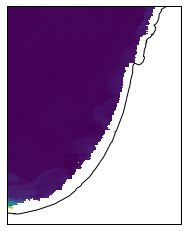

In [9]:
# fig, ax = plt.subplots(figsize=(20, 15), subplot_kw={'projection': projection})
fig, ax = plt.subplots(subplot_kw={'projection': projection})

ax.imshow(
    chl,
    extent=extent,
    transform=projection)

ax.coastlines('10m')
# plt.figure(frameon=False)
fig.savefig('exports/base_chl_map.png')
!ls -lh exports

In [27]:
def add_gridlines(ax, longitude_ticks, latitude_ticks):
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_bottom = True
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.ylabels_left = True
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator(longitude_ticks)
    gl.ylocator = mticker.FixedLocator(latitude_ticks)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    # gl.xlabel_style = {'size': 15, 'color': 'gray'}
    # gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

In [ ]:
def create_chl_map():
    vmin, vmax = 0.01, 0.2

    offset = 0.05
    cities = [((34.97, 32.8), 'Haifa'), ((34.775, 32.05), 'Tel Aviv')]

    # fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': projection})
    fig, ax = plt.subplots(subplot_kw={'projection': projection})

    ax.imshow(
        chl,
        extent=extent,
        norm=colors.LogNorm(vmin=vmax, vmax=vmax),
        vmin=vmin,
        vmax=vmax,
        transform=projection)

    for coords, city in cities:
        x = coords[0]
        y = coords[1]
        ax.scatter(x, y, marker='X', color='black', transform=projection)
        ax.text(x+offset, y-offset, city, fontsize=14, transform=projection)

    longitude_ticks = np.around(np.linspace(extent[0], extent[1], 4), 1)
    latitude_ticks = np.around(np.linspace(extent[2], extent[3], 4), 1)
    add_gridlines(ax, longitude_ticks, latitude_ticks)

    ax.coastlines('10m')
    return ax

/usr/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


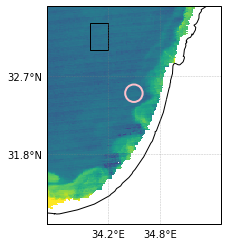

In [11]:
vmin = 0.01
vmax = 0.2

rect_start = 34, 33
rect_size = 0.2, 0.3
rect = patches.Rectangle(rect_start, *rect_size, linewidth=1,
                         edgecolor='k', facecolor='none', transform=projection)

circle_center = 34.5, 32.5
circle = patches.Circle(circle_center, radius=0.1, linewidth=2,
                        edgecolor='pink', facecolor='none', transform=projection)

fig, ax = plt.subplots(subplot_kw={'projection': projection})

ax.imshow(chl, extent=extent, norm=colors.LogNorm(vmin=vmax, vmax=vmax),
          vmin=vmin, vmax=vmax, transform=projection)

longitude_ticks = np.around(np.linspace(extent[0], extent[1], 4), 1)
latitude_ticks = np.around(np.linspace(extent[2], extent[3], 4), 1)
add_gridlines(ax, longitude_ticks, latitude_ticks)

ax.coastlines('10m')
ax.add_patch(circle)
ax.add_patch(rect)
plt.show()

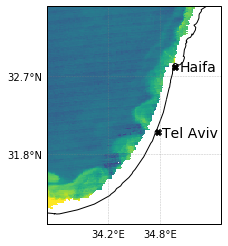

In [28]:

plt.show()

In [13]:
fig.savefig('my_figure.png')
!ls -lh my_figure.png

-rw-r--r-- 1 shaief users 39K Jun  5 11:47 my_figure.png


## Surface currents map using Quivers 

In [14]:
aviso_file = 'data/dataset-duacs-nrt-medsea-merged-allsat-phy-l4_1558034216315.nc'

In [15]:
aviso_ds = xr.open_dataset(aviso_file)

In [16]:
print(aviso_ds)

<xarray.Dataset>
Dimensions:    (latitude: 128, longitude: 344, time: 1)
Coordinates:
  * time       (time) datetime64[ns] 2017-08-01
  * latitude   (latitude) float32 30.0625 30.1875 30.3125 ... 45.8125 45.9375
  * longitude  (longitude) float32 -5.9375 -5.8125 -5.6875 ... 36.8125 36.9375
Data variables:
    adt        (time, latitude, longitude) float64 ...
    ugos       (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    vgosa      (time, latitude, longitude) float64 ...
    err        (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercat

In [17]:
u = aviso_ds.ugos

In [18]:
u.data

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

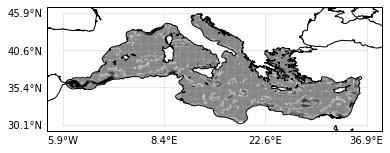

In [19]:
lon, lat = aviso_ds.longitude, aviso_ds.latitude
u, v = aviso_ds.ugos.data[0], aviso_ds.vgos.data[0]
scale = 75

fig, ax = plt.subplots(subplot_kw={'projection': projection})
Q = ax.quiver(lon, lat, u, v, scale=scale, transform=projection)
qk = ax.quiverkey(Q, 0, 28, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='axes', transform=projection)
longitude_ticks = np.around(np.linspace(lon[0], lon[-1], 4), 1)
latitude_ticks = np.around(np.linspace(lat[0], lat[-1], 4), 1)
add_gridlines(ax, longitude_ticks, latitude_ticks)

ax.coastlines('10m')
plt.show()

## Now let's put everything together

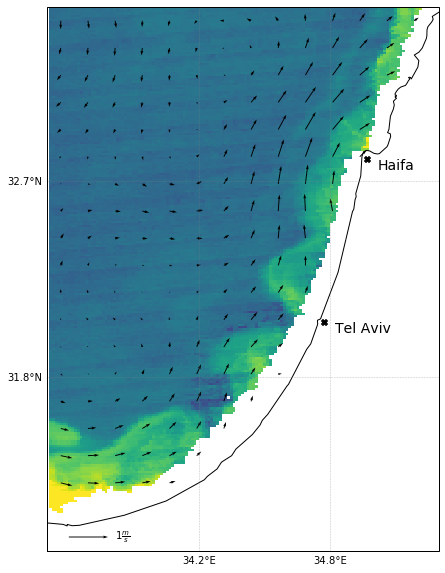

In [26]:
lon, lat = aviso_ds.longitude, aviso_ds.latitude
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': projection})
ax.imshow(
    chl,
    extent=extent,
    norm=colors.LogNorm(vmin=vmax, vmax=vmax),
    vmin=vmin,
    vmax=vmax,
    transform=projection)

for coords, city in cities:
    x = coords[0]
    y = coords[1]
    plt.scatter(x, y, marker='X', color='black', transform=projection)
    plt.text(x+offset, y-offset, city, fontsize=14, transform=projection)
Q = ax.quiver(lon, lat, aviso_ds.ugos.values[0], aviso_ds.vgos.values[0], scale=10, transform=projection)
qk = ax.quiverkey(Q, 1.5, 0.5, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='inches', transform=projection)

longitude_ticks = np.around(np.linspace(extent[0], extent[1], 4), 1)
latitude_ticks = np.around(np.linspace(extent[2], extent[3], 4), 1)
add_gridlines(ax, longitude_ticks, latitude_ticks)
# ax.scatter(34.97, 32.8, color='black', transform=projection)

ax.set_xlim(33.5, 35.3)
ax.set_ylim(31, 33.5)
ax.coastlines('10m')


## Or one next to each other

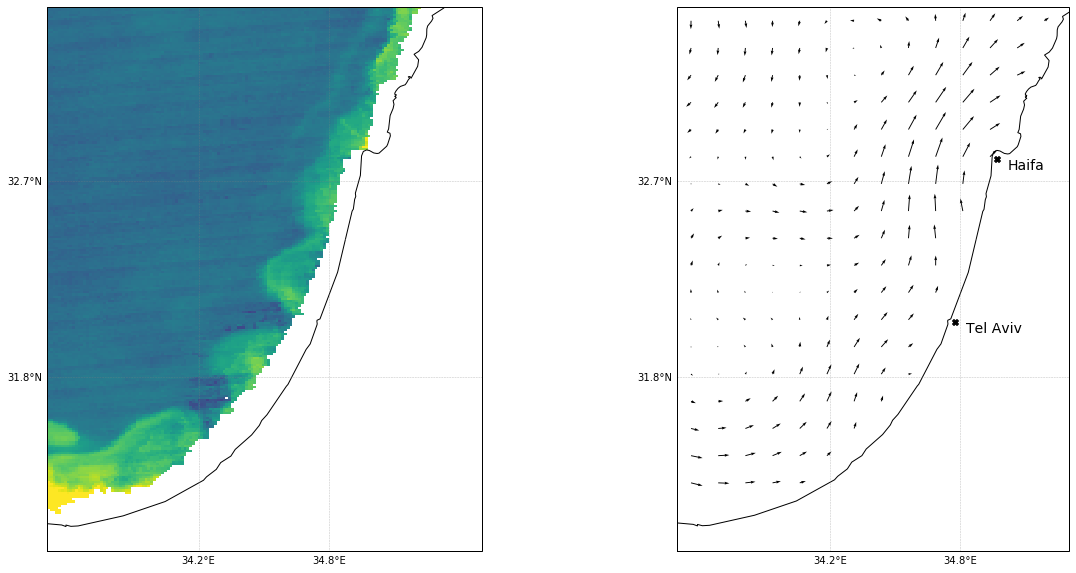

In [21]:
lon, lat = aviso_ds.longitude, aviso_ds.latitude
fig, axes = plt.subplots(1, 2, figsize=(20, 10), subplot_kw={'projection': projection})


axes[0].imshow(
    chl,
    extent=extent,
    norm=colors.LogNorm(vmin=vmax, vmax=vmax),
    vmin=vmin,
    vmax=vmax,
    transform=projection)

for coords, city in cities:
    x = coords[0]
    y = coords[1]
    plt.scatter(x, y, marker='X', color='black', transform=projection)
    plt.text(x+offset, y-offset, city, fontsize=14, transform=projection)

longitude_ticks = np.around(np.linspace(extent[0], extent[1], 4), 1)
latitude_ticks = np.around(np.linspace(extent[2], extent[3], 4), 1)
add_gridlines(axes[0], longitude_ticks, latitude_ticks)
add_gridlines(axes[1], longitude_ticks, latitude_ticks)

axes[1].quiver(lon, lat, aviso_ds.ugos.values[0], aviso_ds.vgos.values[0], scale=10, transform=projection)
axes[1].set_xlim(33.5, 35.3)
axes[1].set_ylim(31, 33.5)
axes[0].coastlines('10m')
axes[1].coastlines('10m')
plt.show()